In [13]:
import cv2
import os
import numpy as np
from skimage import data,filters
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = 'SimHei'  # 设置中文字体
plt.rcParams['axes.unicode_minus'] = False  # 设置正常显示负号

In [2]:
root_2 = 'train_2'
img_names = os.listdir(root_2)
img_names = sorted(img_names,key = lambda name : int(name.split('-')[0])) # 按顺序读取图片

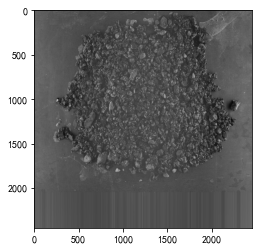

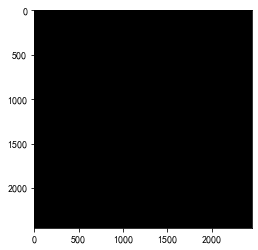

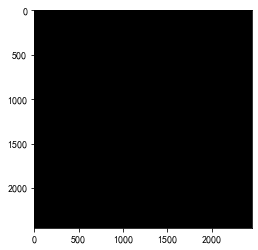

In [22]:
root_2 = '.'
img_names = ['img_gray.png']

percs = []
for i in range(len(img_names)):
    if '.png' not in img_names[i]:
        continue
    imgs = os.path.join(root_2,img_names[i])
    img = cv2.imread('./'+imgs )
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    
    pixel_d = img[-1]# pixel_down
#     img_new = np.zeros((2448,2448,3),dtype = np.uint8)
#     img_new[:2048,:2448]=img
#     img_new[2048:] = pixel_d 
    
    img_Guassian = cv2.GaussianBlur(img,(1223,1223),612)
    
    plt.imshow(img)
    plt.figure()
    plt.imshow(img_new)
    plt.figure()
    plt.imshow(img_Guassian)
    plt.show()
    break

D:\Application\Anaconda\envs\keras\lib\site-packages\ipykernel_launcher.py:14: UserWarning: threshold_otsu is expected to work correctly only for grayscale images; image shape (2448, 2448, 3) looks like an RGB image
  


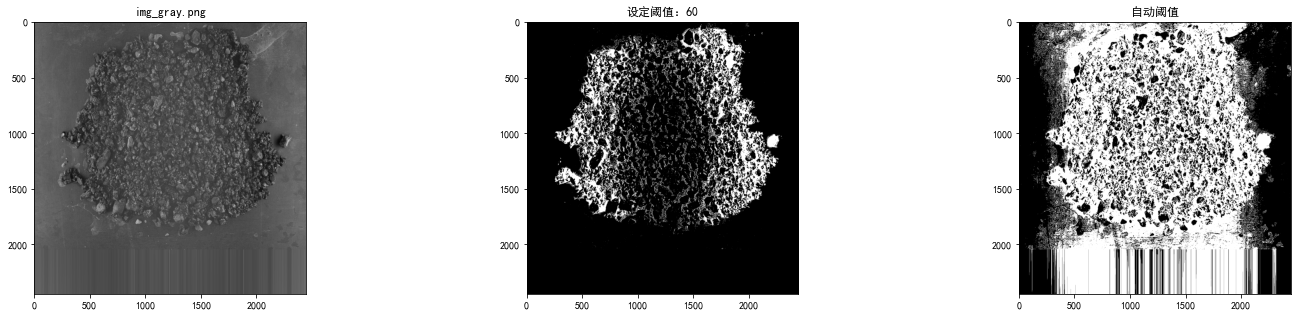

图像大小： 5992704
求和： 784857.0
百分比： 0.13096875800973984


In [25]:
percs = []
for i in range(len(img_names)):
    imgs = os.path.join(root_2,img_names[i])
    img = cv2.imread('./'+imgs )
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    
#     thresh = filters.threshold_otsu(img)   #返回一个阈值
#     dst =(gray <= thresh)*1.0   #根据阈值进行分割

#     thresh_1 = 60   #设定一个阈值
#     dst_1 =(gray <= thresh_1)*1.0   #根据阈值进行分割
    
    thresh = filters.threshold_otsu(img)   #返回一个阈值
    dst =(gray <= thresh)*1.0   #根据阈值进行分割

    thresh_1 = 60   #设定一个阈值
    dst_1 =(gray <= thresh_1)*1.0   #根据阈值进行分割

    plt.figure('thresh',figsize=(25, 5))

    plt.subplot(131)
    plt.title(img_names[i])
    plt.imshow(img, plt.cm.gray)

    plt.subplot(132)
    plt.title('设定阈值：'+ str(thresh_1))
    plt.imshow(dst_1, plt.cm.gray)
    
    plt.subplot(133)
    plt.title('自动阈值')
    plt.imshow(dst,plt.cm.gray)
    plt.show()
    
    ary = np.asarray(dst_1)
    sum_ary = ary.size
    sum_1 = np.sum(ary)
    perc = sum_1 / sum_ary
    
    percs.append(perc)
    
    print('图像大小：', sum_ary)
    print('求和：', sum_1)
    print('百分比：', perc)

In [46]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(100,100))  
morph_img =cv2.morphologyEx(dst_1,cv2.MORPH_CLOSE,kernel)  

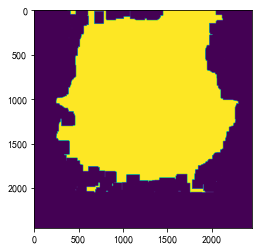

In [47]:
plt.imshow(morph_img)
plt.show()

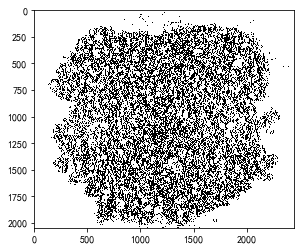

In [4]:
# https://blog.csdn.net/weixin_42009479/article/details/105812705
import cv2
import numpy as np
from scipy.signal import lfilter

N = 10
b = 0.5

def max_min_value_filter(image, ksize=3, mode=1):# 最小值滤波的卷积核
    img = image.copy()
    rows, cols = img.shape
    # if channels == 3:
    #     img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    padding = (ksize-1) // 2
    new_img = cv2.copyMakeBorder(img, padding, padding, padding, padding, cv2.BORDER_CONSTANT, value=255)
    for i in range(rows):
        for j in range(cols):
            roi_img = new_img[i:i+ksize, j:j+ksize].copy()
            min_val, max_val, min_index, max_index = cv2.minMaxLoc(roi_img)
            if mode == 1:
                img[i, j] = max_val
            elif mode == 2:
                img[i, j] = min_val
            else:
                raise Exception("please Select a Mode: max(1) or min(2)")

    return img


def movingthreshold(f, n, k):
    shape = f.shape
    assert n >= 1
    assert 0 < k < 1
    f[1:-1:2, :] = np.fliplr(f[1:-1:2, :])
    f = f.flatten()
    maf = np.ones(n) / n
    res_filter = lfilter(maf, 1, f)
    g = np.array(f > k * res_filter).astype(int)
    g = g.reshape(shape)
    g[1:-1:2, :] = np.fliplr(g[1:-1:2, :])
    g = g * 255

#     max value filter
    g = max_min_value_filter(g, 3, 2)
    cv2.blur(g, (3, 3))

    return g


img = cv2.imread('./train_2/349-2.jpg', 0)
res = movingthreshold(img, N, b)
plt.imshow(res,plt.cm.gray)

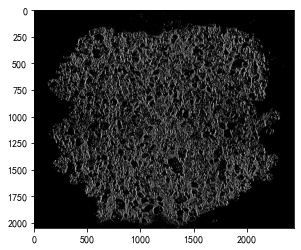

In [61]:
thresh = filters.threshold_otsu(res)
res_otsu = (res<=thresh)*1
res_otsu.astype(np.uint8)
plt.imshow(res_otsu,plt.cm.gray)
plt.show()

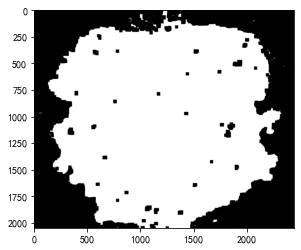

In [78]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(30,30))  
morph_img =cv2.morphologyEx(res_otsu.astype(np.float)
                            ,cv2.MORPH_CLOSE,kernel) 
plt.imshow(morph_img,plt.cm.gray)
plt.show()

# 整理
由于亮度不统一，还是大津法等自动分割算法会更好些

之前可能做一个高斯滤波也比较不错

判断中心是0多还是1多，按百分比裁切

In [103]:
# https://blog.csdn.net/weixin_42009479/article/details/105812705
import cv2
import numpy as np
from scipy.signal import lfilter

N = 10
b = 0.5

def max_min_value_filter(image, ksize=3, mode=1):# 最小值滤波的卷积核
    img = image.copy()
    rows, cols = img.shape
    # if channels == 3:
    #     img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    padding = (ksize-1) // 2
    new_img = cv2.copyMakeBorder(img, padding, padding, padding, padding, cv2.BORDER_CONSTANT, value=1)
    for i in range(rows):
        for j in range(cols):
            roi_img = new_img[i:i+ksize, j:j+ksize].copy()
            min_val, max_val, min_index, max_index = cv2.minMaxLoc(roi_img)
            if mode == 1:
                img[i, j] = max_val
            elif mode == 2:
                img[i, j] = min_val
            else:
                raise Exception("please Select a Mode: max(1) or min(2)")

    return img


def movingthreshold(f, n, k):
    shape = f.shape
    assert n >= 1
    assert 0 < k < 1
    f[1:-1:2, :] = np.fliplr(f[1:-1:2, :])
    f = f.flatten()
    maf = np.ones(n) / n
    res_filter = lfilter(maf, 1, f)
    g = np.array(f > k * res_filter).astype(int)
    g = g.reshape(shape)
    g[1:-1:2, :] = np.fliplr(g[1:-1:2, :])
#     g = g * 255

#     max value filter
#     g = max_min_value_filter(g, 3, 2)
#     cv2.blur(g, (3, 3))

    return g

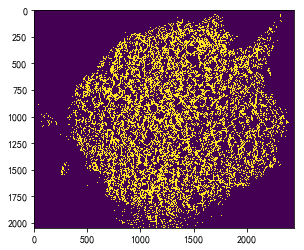

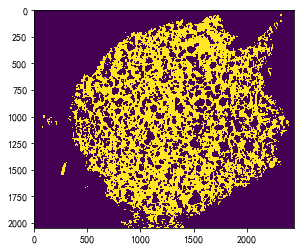

In [106]:
img_path = 'train_2/322-2.jpg'
img = cv2.imread(img_path)

# 灰度图
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# 移动平均阈值
gray_mt = 1-movingthreshold(gray,5,0.5)

# 最大滤波
g_max = max_min_value_filter(gray_mt,3,1)
cv2.blur(g_max,(3,3))
plt.figure()
plt.imshow(g_max)

# 形态学闭运算
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(10,10))  
morph_img =cv2.morphologyEx(g_max.astype(np.float)
                            ,cv2.MORPH_CLOSE,kernel) 

# 形态学开运算
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(5,5))  
morph_img =cv2.morphologyEx(morph_img.astype(np.float)
                            ,cv2.MORPH_OPEN,kernel) 


plt.figure()
plt.imshow(morph_img)
plt.show()


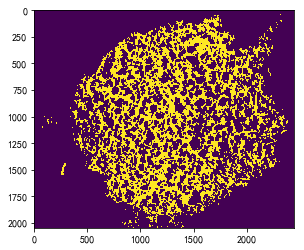

In [185]:
img_path = 'train_2/322-2.jpg'
img = cv2.imread(img_path)

# 灰度图
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# 移动平均阈值
gray_mt = 1-movingthreshold(gray,5,0.5)

# 最大滤波
# g_max = max_min_value_filter(gray_mt,3,1)
# cv2.blur(g_max,(3,3))
# plt.figure()
# plt.imshow(g_max)

# 形态学闭运算
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(10,10))  
morph_img =cv2.morphologyEx(gray_mt.astype(np.float)
                            ,cv2.MORPH_CLOSE,kernel) 

# 形态学开运算
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(5,5))  
morph_img =cv2.morphologyEx(morph_img.astype(np.float)
                            ,cv2.MORPH_OPEN,kernel) 


plt.figure()
plt.imshow(morph_img)
plt.show()


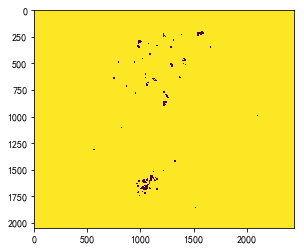

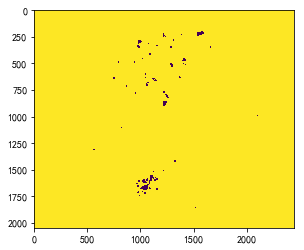

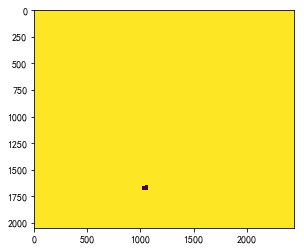

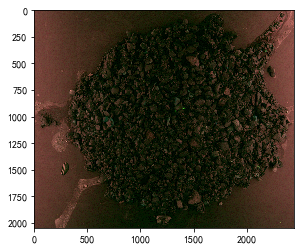

In [184]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(10,10))  
morph_img =cv2.morphologyEx(g_max.astype(np.float)
                            ,cv2.MORPH_CLOSE,kernel) 
plt.figure()
plt.imshow(morph_img)

kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(5,5))  
morph_img =cv2.morphologyEx(morph_img.astype(np.float)
                            ,cv2.MORPH_OPEN,kernel) 
plt.figure()
plt.imshow(morph_img)

kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(30,30))  
morph_img =cv2.morphologyEx(morph_img.astype(np.float)
                            ,cv2.MORPH_CLOSE,kernel) 

kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(30,30))  
morph_img =cv2.morphologyEx(morph_img.astype(np.float)
                            ,cv2.MORPH_CLOSE,kernel) 
plt.figure()
plt.imshow(morph_img)
plt.show()


plt.figure()
plt.imshow(img)
plt.show()



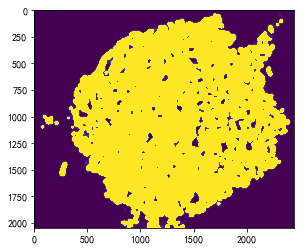

In [186]:
g_t = 0.3
ksize = 55
sigma = 5
img_gauss = cv2.GaussianBlur(morph_img,(ksize,ksize),sigma)
img_gauss[img_gauss>g_t]=1
# plt.figure()
# plt.imshow(img_gauss)
img_gauss = cv2.GaussianBlur(img_gauss,(ksize,ksize),sigma)
img_gauss[img_gauss>g_t]=1
# plt.figure()
# plt.imshow(img_gauss)
img_gauss = cv2.GaussianBlur(img_gauss,(ksize,ksize),sigma)
img_gauss[img_gauss>g_t]=1
img_gauss = cv2.GaussianBlur(img_gauss,(ksize,ksize),sigma)
img_gauss[img_gauss>g_t]=1
img_gauss = cv2.GaussianBlur(img_gauss,(ksize,ksize),sigma)
img_gauss[img_gauss>g_t]=1
plt.figure()
plt.imshow(img_gauss)
plt.show()

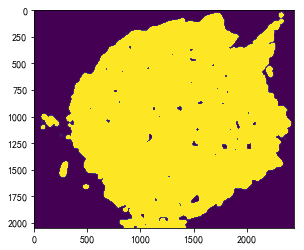

In [183]:
g_t = 0.3
ksize = 55
sigma = 5
img_gauss = cv2.GaussianBlur(morph_img,(ksize,ksize),sigma)
img_gauss[img_gauss>g_t]=1
# plt.figure()
# plt.imshow(img_gauss)
img_gauss = cv2.GaussianBlur(img_gauss,(ksize,ksize),sigma)
img_gauss[img_gauss>g_t]=1
# plt.figure()
# plt.imshow(img_gauss)
img_gauss = cv2.GaussianBlur(img_gauss,(ksize,ksize),sigma)
img_gauss[img_gauss>g_t]=1
img_gauss = cv2.GaussianBlur(img_gauss,(ksize,ksize),sigma)
img_gauss[img_gauss>g_t]=1
img_gauss = cv2.GaussianBlur(img_gauss,(ksize,ksize),sigma)
img_gauss[img_gauss>g_t]=1
plt.figure()
plt.imshow(img_gauss)
plt.show()

In [163]:
# center = 
morph_fill = cv2.floodFill(img_gauss.copy().astype(np.uint8),mask = None,seedPoint = (1500,150), newVal=(1))

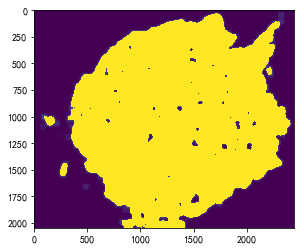

In [181]:
img_gauss = cv2.blur(morph_img,(ksize,ksize),sigma)
img_gauss[img_gauss>0.2]=1
plt.imshow(img_gauss)
plt.show()